In [158]:
using DifferentialEquations
using DifferentialEquations
α=1
u0 = [0.2;0.1]
f123 = function (t,u,du) #Be careful: Anonymous Function allows for easy function redefinition on the fly. Note that function redefines an input, du. BUT anonymous functions are VERY SLOW in global scope. BUT you can make them faster by wrapping the whole thing in a function that just returns sol.
    for i = 1:2
        du[i] = α*i^2*u[i]   #Explicitly call each element - helps with background ODE definition.  However, see trick below for splitting up the definition.
    end
end
tspan = (0.0,1.0)
prob2 = ODEProblem(f123,u0,tspan)
sol3 = solve(prob2)

DiffEqBase.ODESolution{Float64,2,Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,##69#70,Void,UniformScaling{Int64}},OrdinaryDiffEq.Tsit5,OrdinaryDiffEq.InterpolationData{##69#70,Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Tsit5Cache{Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{Float64,1},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}}}(Array{Float64,1}[[0.2,0.1],[0.212719,0.12797],[0.232249,0.181844],[0.257986,0.276862],[0.293211,0.461955],[0.339761,0.83286],[0.401565,1.62518],[0.483107,3.40444],[0.543656,5.45972]],nothing,nothing,[0.0,0.0616556,0.149495,0.254587,0.382574,0.529925,0.697052,0.88192,1.0],Array{Array{Float64,1},1}[Array{Float64,1}[[2.20546e-314,2.24785e-314]],Array{Float64,1}[[0.2,0.4],[0.201985,0.415882],[0.204073,0.433572],[0.211415,0.499993],[0.212464,0.510438],[0.212727,0.513059],[0.212719,0.511878]],Array{Float


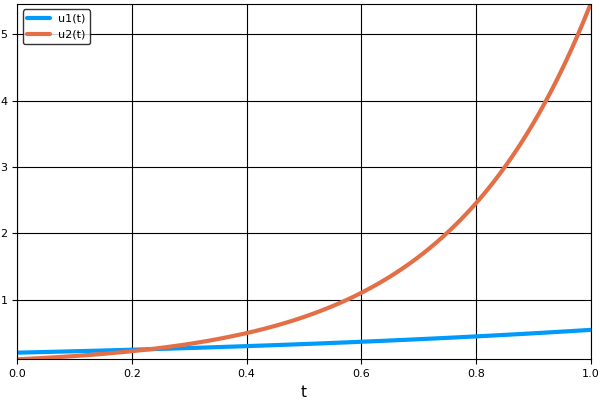

In [105]:
plot(sol3)

In [72]:
using Plots

INFO: Recompiling stale cache file /Users/thomasmoore/.julia/lib/v0.5/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/thomasmoore/.julia/lib/v0.5/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/thomasmoore/.julia/lib/v0.5/PlotUtils.ji for module PlotUtils.
INFO: Recompiling stale cache file /Users/thomasmoore/.julia/lib/v0.5/PlotThemes.ji for module PlotThemes.


In [57]:
rober = @ode_def_noinvjac Rober begin
  dy₁ = -k₁*y₁+k₃*y₂*y₃
  dy₂ =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  dy₃ =  k₂*y₂^2
end k₁=>0.04 k₂=>3e7 k₃=>1e4
prob_ode_rober = ODEProblem(rober,[1.0;0.0;0.0],(0.0,1e11))
sol = solve(prob_ode_rober,Rosenbrock23())

DiffEqBase.ODESolution{Float64,2,Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,Rober,Void,UniformScaling{Int64}},OrdinaryDiffEq.Rosenbrock23{0,true,DiffEqBase.LinSolveFactorize{Base.LinAlg.#lufact!}},OrdinaryDiffEq.InterpolationData{Rober,Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Rosenbrock23Cache{Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{ForwardDiff.Dual{3,Float64},1},Array{Float64,1},Array{Float64,2},OrdinaryDiffEq.Rosenbrock23ConstantCache{Float64,Base.#identity,Base.#identity},OrdinaryDiffEq.TimeGradientWrapper{OrdinaryDiffEq.VectorF{Rober,Tuple{Int64}},Array{Float64,1},Array{ForwardDiff.Dual{3,Float64},1}},OrdinaryDiffEq.UJacobianWrapper{OrdinaryDiffEq.VectorFReturn{Rober,Tuple{Int64}},Float64},DiffEqBase.LinSolveFactorize{Base.LinAlg.#lufact!},ForwardDiff.JacobianConfig{3,Float64,Tuple{Array{ForwardDiff.Dual{3,Float64},1},

In [60]:
f22 = (t,u,du) -> begin
  du[1] = -0.04*u[1] + 1e4*u[2]*u[3]
  du[2] = 0.04*u[1] - 3e7*u[2]^2 - 1e4*u[2]*u[3]
  du[3] = 3e7*u[2]^2
end
prob_ode_rober = ODEProblem(f22,[1.0;0.0;0.0],(0.0,1e11))
sol = solve(prob_ode_rober,Rosenbrock23())


DiffEqBase.ODESolution{Float64,2,Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,##7#8,Void,UniformScaling{Int64}},OrdinaryDiffEq.Rosenbrock23{0,true,DiffEqBase.LinSolveFactorize{Base.LinAlg.#lufact!}},OrdinaryDiffEq.InterpolationData{##7#8,Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Rosenbrock23Cache{Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{ForwardDiff.Dual{3,Float64},1},Array{Float64,1},Array{Float64,2},OrdinaryDiffEq.Rosenbrock23ConstantCache{Float64,Base.#identity,Base.#identity},OrdinaryDiffEq.TimeGradientWrapper{OrdinaryDiffEq.VectorF{##7#8,Tuple{Int64}},Array{Float64,1},Array{ForwardDiff.Dual{3,Float64},1}},OrdinaryDiffEq.UJacobianWrapper{OrdinaryDiffEq.VectorFReturn{##7#8,Tuple{Int64}},Float64},DiffEqBase.LinSolveFactorize{Base.LinAlg.#lufact!},ForwardDiff.JacobianConfig{3,Float64,Tuple{Array{ForwardDiff.Dual{3,Float64},1},

In [61]:
sol(1)

3-element Array{Float64,1}:
 0.966469  
 3.07298e-5
 0.0334999 

In [122]:
using DifferentialEquations
A = [1.0 0.0; 0.0 2.0]
u0 = [0.2;0.1]
f123 = function (t,u,du) #Anonymous Function allows for easy function redefinition on the fly. Note that function redefines an input, du
    dutot = A*u
    for i = 1:2
        du[i] = dutot[i]
    end
end
tspan = (0.0,1.0)
prob2 = ODEProblem(f123,u0,tspan)
sol3 = solve(prob2)

DiffEqBase.ODESolution{Float64,2,Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,##27#28,Void,UniformScaling{Int64}},OrdinaryDiffEq.Tsit5,OrdinaryDiffEq.InterpolationData{##27#28,Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.Tsit5Cache{Array{Float64,1},Array{Float64,1},Array{Float64,1},Array{Float64,1},OrdinaryDiffEq.Tsit5ConstantCache{Float64,Float64}}}}(Array{Float64,1}[[0.2,0.1],[0.21685,0.11756],[0.252526,0.159423],[0.305124,0.232752],[0.3854,0.371333],[0.506774,0.642049],[0.543656,0.738904]],nothing,nothing,[0.0,0.0808904,0.233195,0.422402,0.655965,0.929748,1.0],Array{Array{Float64,1},1}[Array{Float64,1}[[0.0,0.0]],Array{Float64,1}[[0.2,0.2],[0.202605,0.205209],[0.205361,0.210863],[0.215112,0.231428],[0.216517,0.234511],[0.216869,0.235285],[0.21685,0.23512]],Array{Float64,1}[[0.21685,0.23512],[0.222168,0.246651],[0.227922,0.259719],[0.248781,0.


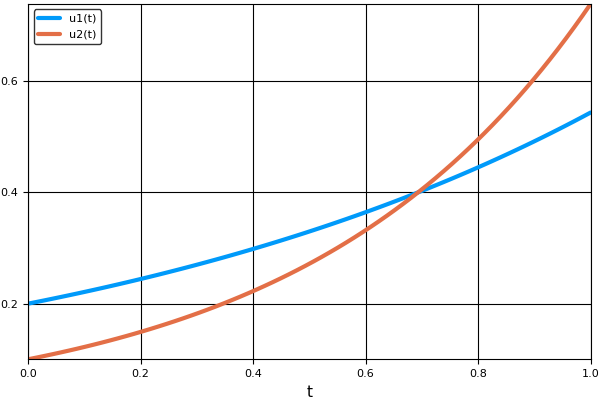

In [123]:
plot(sol3)

In [112]:
dot([1,2],[2,3])

8

In [241]:
#Pkg.add("ODEInterfaceDiffEq")
#using ODEInterfaceDiffEq

#using DifferentialEquations
function testing2(α)
u0 = collect(linspace(0.1,1,100))
f111 = function (t,u,du) #Anonymous Function allows for easy function redefinition on the fly. Note that function redefines an input, du
    for i = 1:100
        du[i] = sum([(-1)^i*α*sin(50*u[i]) for i in 1:100])  #Explicitly call each element - helps with background ODE definition.  However, see trick below for splitting up the definition.
    end
end
tspan = (0.0,2.0)
prob2 = ODEProblem(f111,u0,tspan)
sol3 = solve(prob2, CVODE_BDF())
    return sol3
end

#@time testing()

testing2 (generic function with 1 method)


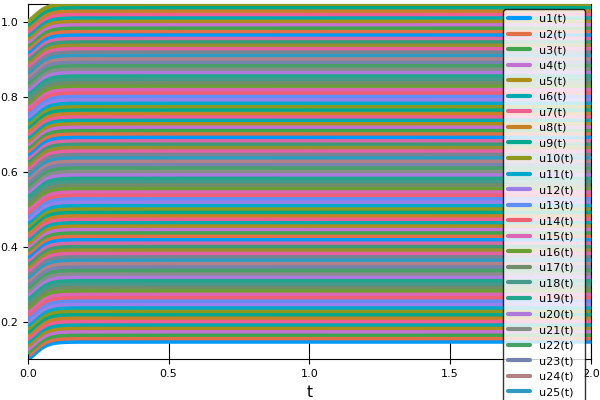

In [243]:
plot(sol5)

In [242]:
@time sol5 = testing2(1.0)

  0.447055 seconds (335.80 k allocations: 33.188 MB, 5.61% gc time)


DiffEqBase.ODESolution{Float64,2,Array{Array{Float64,1},1},Void,Void,Array{Float64,1},Array{Any,1},DiffEqBase.ODEProblem{Array{Float64,1},Float64,true,##123#125{Float64},Void,UniformScaling{Int64}},Sundials.CVODE_BDF{:Newton,:Dense},DiffEqBase.##20#22}(Array{Float64,1}[[0.1,0.109091,0.118182,0.127273,0.136364,0.145455,0.154545,0.163636,0.172727,0.181818  …  0.918182,0.927273,0.936364,0.945455,0.954545,0.963636,0.972727,0.981818,0.990909,1.0],[0.102056,0.111147,0.120238,0.129329,0.13842,0.14751,0.156601,0.165692,0.174783,0.183874  …  0.920238,0.929329,0.93842,0.94751,0.956601,0.965692,0.974783,0.983874,0.992965,1.00206],[0.104283,0.113374,0.122465,0.131556,0.140646,0.149737,0.158828,0.167919,0.17701,0.186101  …  0.922465,0.931556,0.940646,0.949737,0.958828,0.967919,0.97701,0.986101,0.995192,1.00428],[0.110765,0.119856,0.128947,0.138038,0.147129,0.15622,0.165311,0.174402,0.183492,0.192583  …  0.928947,0.938038,0.947129,0.95622,0.965311,0.974402,0.983492,0.992583,1.00167,1.01077],[0.11749

In [217]:
sol5(.2)

LoadError: Solution interpolation cannot extrapolate past the final timepoint. Either solve on a longer timespan or use the local extrapolation from the integrator interface.

In [202]:
LinSpace(0.1,1.0,0.0,100.0)

1-element LinSpace{Float64}:
 -0.001

In [208]:
collect(linspace(0,1,10))

10-element Array{Float64,1}:
 0.0     
 0.111111
 0.222222
 0.333333
 0.444444
 0.555556
 0.666667
 0.777778
 0.888889
 1.0     